In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset_path = "/content/drive/My Drive/lung_colon_image_set/"  # Change this if needed

import os

image_paths = []
for root, _, files in os.walk(dataset_path):
    for file in files:
        if file.lower().endswith((".png", ".jpg", ".jpeg")):
            image_paths.append(os.path.join(root, file))

print(f"Total images found: {len(image_paths)}")  # Should be ~25,000


Total images found: 25006


<h1 style="color: #68D2E8; font-size: 32px; font-weight: bold;">
    🏥 1. Introduction
</h1>

<p><strong>🩺 Goal:</strong></p>
<p>This project focuses on the classification of histopathological images of lung and colon tissues to aid in cancer diagnosis. Histopathology plays a crucial role in detecting and differentiating between benign and malignant tissues, enabling early diagnosis and timely treatment of cancer patients.</p>

<p>In this study, we implement two deep learning approaches:</p>
<ul>
    <li>🧬 A custom Convolutional Neural Network (CNN) model trained from scratch</li>
    <li>🖥️ A Transfer Learning approach using pretrained models such as VGG16, ResNet, or EfficientNet</li>
</ul>

<p>By comparing both models, we aim to determine the most effective approach for classifying histopathological images of lung and colon tissue.</p>

<h2 style="color: #D2FF72; font-weight: bold;"> 🏨 Medical Context:</h2>

<p>🩸 <strong>Cancer</strong> is one of the leading causes of death worldwide. The accurate classification of histopathological images is essential for oncologists and pathologists in determining the appropriate treatment plan. This dataset allows us to automate and enhance the detection of different tissue types, reducing human error and improving efficiency in cancer diagnosis.</p>

<h3 style="color: #FFFF80; font-weight: bold;"> 🔬 Histopathology Overview:</h3>
<ul>
    <li>🦠 Histopathology involves examining tissue samples under a microscope to identify abnormalities in cellular structures.</li>
    <li>🧫 Benign tissues have normal cell morphology and organization, whereas malignant tissues exhibit irregular cell structures, increased mitotic activity, and disrupted architecture.</li>
    <li>🛑 Classifying lung and colon tissue samples into benign and malignant categories can significantly assist in early-stage cancer detection.</li>
</ul>

<h3 style="color: #FFFF80; font-weight: bold;"> 🏥 Types of Cancer in the Dataset:</h3>
<ul>
    <li>🫁 <strong>Lung Adenocarcinoma:</strong> A type of non-small cell lung cancer (NSCLC) originating from mucus-producing cells in the lungs.</li>
    <li>🫁 <strong>Lung Squamous Cell Carcinoma:</strong> Another form of NSCLC that begins in the squamous cells lining the airways.</li>
    <li>🦠 <strong>Colon Adenocarcinoma:</strong> The most common form of colorectal cancer, originating from glandular cells in the colon lining.</li>
</ul>

<h2 style="color: #D2FF72; font-weight: bold;"> ⚕️ Key Steps:</h2>
<ul>
    <li>🩻 <strong>Data Understanding</strong> – Exploring the dataset structure and distribution.</li>
    <li>🧪 <strong>Data Exploration & Visualization</strong> – Examining sample images and their histopathological characteristics.</li>
    <li>🧼 <strong>Data Preprocessing</strong> – Image resizing, normalization, and augmentation.</li>
    <li>⚖️ <strong>Handling Class Imbalance</strong> – Ensuring balanced training samples.</li>
    <li>🧠 <strong>Modeling (Custom CNN)</strong> – Designing and training a CNN from scratch.</li>
    <li>🦾 <strong>Transfer Learning</strong> – Fine-tuning a pretrained model for classification.</li>
    <li>📉 <strong>Model Evaluation & Comparison</strong> – Analyzing performance metrics and determining the best approach.</li>
</ul>

<h2 style="color: #D2FF72; font-weight: bold;"> 🧬 Models Used:</h2>
<ul>
    <li>🩻 Custom CNN Model</li>
    <li>🧠 Transfer Learning with Pretrained Models (e.g., VGG16, ResNet, EfficientNet)</li>
</ul>

<h2 style="color: #D2FF72; font-weight: bold;"> 🏷️ Dataset:</h2>
<p>This dataset contains <strong>25,000 histopathological images</strong> across <strong>five classes</strong>, with each class containing 5,000 images.</p>

<h3 style="color: #FFFF80; font-weight: bold;"> 🗂️ Dataset Composition:</h3>
<ul>
    <li>🫁 <strong>Lung Benign Tissue</strong> (5,000 images)</li>
    <li>🫁 <strong>Lung Adenocarcinoma</strong> (5,000 images)</li>
    <li>🫁 <strong>Lung Squamous Cell Carcinoma</strong> (5,000 images)</li>
    <li>🦠 <strong>Colon Adenocarcinoma</strong> (5,000 images)</li>
    <li>🦠 <strong>Colon Benign Tissue</strong> (5,000 images)</li>
</ul>

<p>The original dataset consisted of <strong>750 lung tissue images</strong> (250 benign, 250 adenocarcinoma, and 250 squamous cell carcinoma) and <strong>500 colon tissue images</strong> (250 benign, 250 adenocarcinoma). These were augmented to <strong>25,000 images</strong> using the Augmentor package.</p>

<h2 style="color: #D2FF72;"> 📊 Evaluation Metrics:</h2>
<ul>
    <li>📈 <strong>Accuracy</strong> – Measures the overall correctness of the model.</li>
    <li>🎯 <strong>Precision</strong> – Determines the proportion of true positive predictions.</li>
    <li>🔄 <strong>Recall</strong> – Evaluates how well the model identifies actual cancer cases.</li>
    <li>📊 <strong>F1-score</strong> – Balances precision and recall for a comprehensive performance measure.</li>
    <li>🧪 <strong>ROC-AUC</strong> – Analyzes the trade-off between sensitivity and specificity.</li>
</ul>

<p>By implementing this study, we aim to enhance automated medical image classification, assisting pathologists in making faster and more accurate cancer diagnoses.</p>


<h1 style="text-align: center; color: lightpink; font-size: 36px; font-weight: bold;">
    🫁 Lung & Colon Cancer Detection Using CNN 🫁
</h1>
<hr style="height: 2px; border: none; background-color: #ff69b4;">


<h1 style="color: #B7E0FF; font-size: 32px; font-weight: bold;">
    🩻 2. Data Understanding
</h1>

<p>This section helps us explore and understand the dataset before we proceed with preprocessing and training models. We will look at the dataset structure, the classes it contains, and the characteristics of the images, as well as how we loaded and prepared the data.</p>

<h2 style="color: #D2FF72; font-weight: bold;">📂 About the Dataset</h2>
<ul>
    <li>🖼️ The dataset contains <strong>25,000 histopathological images</strong> of <strong>lung</strong> and <strong>colon</strong> tissue, organized into 5 classes.</li>
    <li>📏 Image size: <strong>768x768 pixels</strong> in <strong>JPEG format</strong>.</li>
    <li>🧪 The images were <strong>augmented</strong> from an original set of <strong>1,250 images</strong> using the <strong>Augmentor package</strong>, increasing diversity for robust model training.</li>
</ul>

<h2 style="color: #D2FF72; font-weight: bold;">🔬 Classes in the Dataset</h2>
<p>The dataset consists of <strong>5 balanced classes</strong>, each containing <strong>5,000 images</strong>. These classes represent different types of lung and colon tissue:</p>
<ul>
    <li>1️⃣ <strong>Lung Benign Tissue</strong> 🫁 ✅</li>
    <li>2️⃣ <strong>Lung Adenocarcinoma</strong> 🫁 🔬</li>
    <li>3️⃣ <strong>Lung Squamous Cell Carcinoma</strong> 🫁 🦠</li>
    <li>4️⃣ <strong>Colon Adenocarcinoma</strong> 🏥 🔬</li>
    <li>5️⃣ <strong>Colon Benign Tissue</strong> 🏥 ✅</li>
</ul>

<h2 style="color: #D2FF72; font-weight: bold;">📝 Steps in This Section:</h2>
<ul>
    <li>✔️ <strong>Load the dataset & visualize sample images</strong> 🖼️ - Load images from the subdirectories and assign them labels based on their class. Visualize sample images to check their quality and distribution across classes.</li>
    <li>✔️ <strong>Check the number of images per class</strong> 📊 - Ensure that the dataset is balanced, with an equal number of images per class, which is important for model training.</li>
    <li>✔️ <strong>Analyze image dimensions, format, and color channels</strong> 🎨 - Examine the image resolution, format, and color channels (RGB) to determine the necessary preprocessing steps for input into the model.</li>
</ul>




In [4]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


In [7]:
import os
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define dataset path
dataset_path = "/content/drive/My Drive/lung_colon_image_set/"

# Categories mapped to their subdirectories
categories = {
    "Colon Adenocarcinoma": "colon_image_sets/colon_aca",
    "Colon Benign": "colon_image_sets/colon_n",
    "Lung Adenocarcinoma": "lung_image_sets/lung_aca",
    "Lung Benign": "lung_image_sets/lung_n",
    "Lung Squamous": "lung_image_sets/lung_scc"
}

# Create lists to store file paths and labels
filepaths = []
labels = []

# Loop through categories to get file paths and labels
for label, subdir in categories.items():
    img_dir = os.path.join(dataset_path, subdir)

    # Check if the directory exists
    if not os.path.exists(img_dir) or not os.listdir(img_dir):
        print(f"Warning: No images found in {img_dir}")
        continue

    # Loop through each image file in the subdirectory
    for filename in os.listdir(img_dir):
        file_path = os.path.join(img_dir, filename)

        # Append file path and corresponding label
        filepaths.append(file_path)
        labels.append(label)

# Create a DataFrame to store the file paths and labels
df = pd.DataFrame({'filepaths': filepaths, 'labels': labels})

# Display the first few entries of the DataFrame
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,filepaths,labels
0,/content/drive/My Drive/lung_colon_image_set/c...,Colon Adenocarcinoma
1,/content/drive/My Drive/lung_colon_image_set/c...,Colon Adenocarcinoma
2,/content/drive/My Drive/lung_colon_image_set/c...,Colon Adenocarcinoma
3,/content/drive/My Drive/lung_colon_image_set/c...,Colon Adenocarcinoma
4,/content/drive/My Drive/lung_colon_image_set/c...,Colon Adenocarcinoma
...,...,...
25001,/content/drive/My Drive/lung_colon_image_set/l...,Lung Squamous
25002,/content/drive/My Drive/lung_colon_image_set/l...,Lung Squamous
25003,/content/drive/My Drive/lung_colon_image_set/l...,Lung Squamous
25004,/content/drive/My Drive/lung_colon_image_set/l...,Lung Squamous


<h1 style="color: #D2FF72; font-size: 32px; font-weight: bold;">
     Data Splitting
</h1>

<p>In this section, we will split the dataset into three subsets: <strong>Training</strong>, <strong>Validation</strong>, and <strong>Test</strong>. This ensures that we have distinct data for training the model, tuning the hyperparameters, and evaluating the final performance of the model.</p>

<h2 style="color: lightpink; font-weight: bold;">🔀 Splitting the Data</h2>
<p>We will split the dataset into the following proportions:</p>
<ul>
    <li>🟢 <strong>Training Set</strong>: 80% of the data.</li>
    <li>🟠 <strong>Validation Set</strong>: 10% of the data (split equally from the remaining 20%).</li>
    <li>🔴 <strong>Test Set</strong>: 10% of the data (split equally from the remaining 20%).</li>
</ul>

<h2 style="color: lightpink; font-weight: bold;">💡 Stratified Sampling</h2>
<p>We will use <strong>stratified sampling</strong> to ensure that the class distribution in each subset is representative of the entire dataset. This is important to avoid class imbalance issues in the training, validation, and test sets.</p>


In [8]:
from sklearn.model_selection import train_test_split

# First, split into training (70%) and temp (30%)
train_df, temp_df = train_test_split(df, test_size=0.3, stratify=df['labels'], random_state=42)

# Then, split temp into validation (15%) and test (15%)
valid_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['labels'], random_state=42)

# Print dataset sizes
print(f"Training set: {len(train_df)} images")
print(f"Validation set: {len(valid_df)} images")
print(f"Test set: {len(test_df)} images")


Training set: 17504 images
Validation set: 3751 images
Test set: 3751 images


2️⃣ Load Data into ImageDataGenerators


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define ImageDataGenerators (with augmentation for training)
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
valid_test_datagen = ImageDataGenerator(rescale=1./255)

# Set batch size and image size
batch_size = 64
img_size = (224, 224)

# Create generators
train_gen = train_datagen.flow_from_dataframe(
    train_df, x_col='filepaths', y_col='labels', target_size=img_size,
    class_mode='categorical', color_mode='rgb', batch_size=batch_size, shuffle=True
)

valid_gen = valid_test_datagen.flow_from_dataframe(
    valid_df, x_col='filepaths', y_col='labels', target_size=img_size,
    class_mode='categorical', color_mode='rgb', batch_size=batch_size, shuffle=True
)

test_gen = valid_test_datagen.flow_from_dataframe(
    test_df, x_col='filepaths', y_col='labels', target_size=img_size,
    class_mode='categorical', color_mode='rgb', batch_size=batch_size, shuffle=False
)
#print file distrubution
print(train_df['labels'].value_counts())
print(valid_df['labels'].value_counts())
print(test_df['labels'].value_counts())


Found 17504 validated image filenames belonging to 5 classes.
Found 3751 validated image filenames belonging to 5 classes.
Found 3751 validated image filenames belonging to 5 classes.
labels
Colon Benign            3503
Lung Squamous           3501
Lung Adenocarcinoma     3500
Colon Adenocarcinoma    3500
Lung Benign             3500
Name: count, dtype: int64
labels
Lung Squamous           751
Colon Adenocarcinoma    750
Colon Benign            750
Lung Benign             750
Lung Adenocarcinoma     750
Name: count, dtype: int64
labels
Colon Benign            751
Lung Adenocarcinoma     750
Lung Benign             750
Lung Squamous           750
Colon Adenocarcinoma    750
Name: count, dtype: int64


<h1 style="color: #D2FF72; font-size: 32px; font-weight: bold;">
    Visualizing the Image Batch
</h1>

<p>In this section, we visualize a batch of images from the training data to inspect how well the images are being loaded and to check the class labels associated with each image. This step helps in ensuring that the data is correctly labeled and preprocessed before training.</p>

<h2 style="color: lightpink; font-weight: bold;">🔎 Visualizing a Batch of Images</h2>
<p>The following code will display a grid of 16 images from the training set along with their corresponding class labels. We will scale the image pixel values to a range of 0 to 1, and then use the class indices to map the image to its correct label.</p>


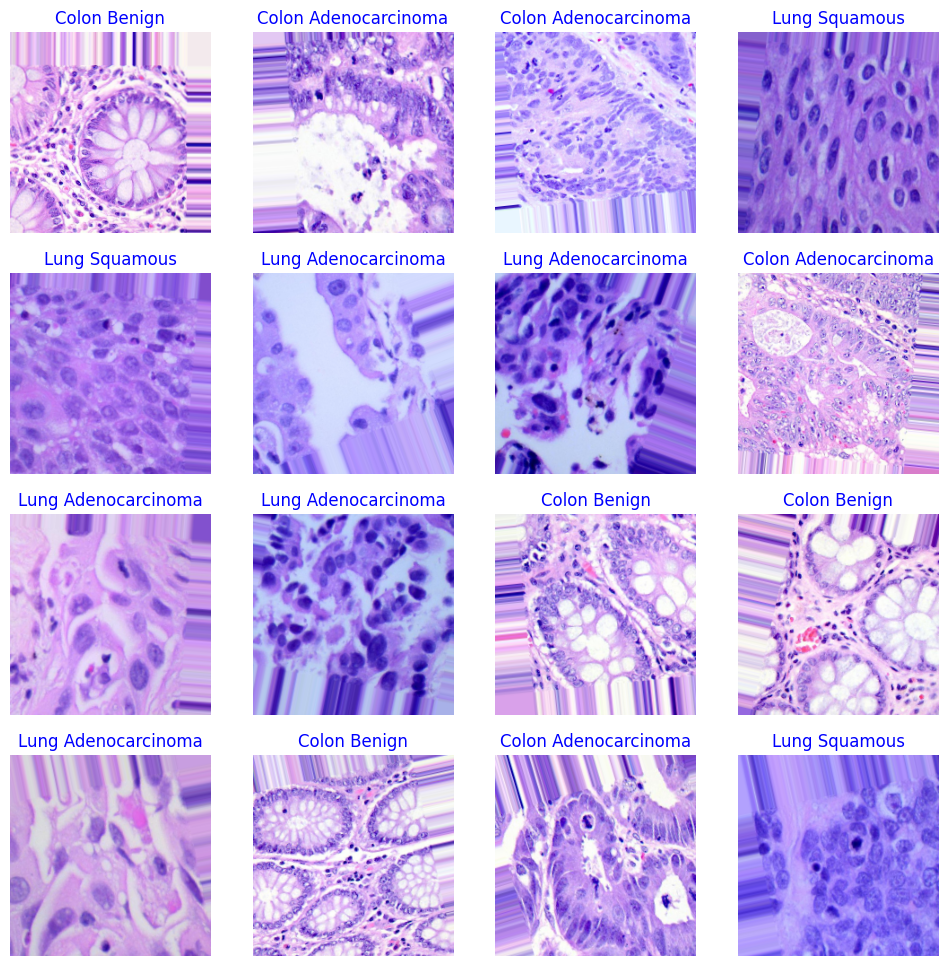

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Get a batch of images and labels
images, labels = next(train_gen)

# Get class names from generator
class_indices = train_gen.class_indices  # {'class_name': index}
classes = list(class_indices.keys())  # List of class names

# Plot images
plt.figure(figsize=(12, 12))
for i in range(16):  # Show 16 images
    plt.subplot(4, 4, i + 1)
    img = images[i]  # Extract image
    label_idx = np.argmax(labels[i])  # Get predicted class index
    class_name = classes[label_idx]  # Get class name

    plt.imshow(img)
    plt.title(class_name, color="blue", fontsize=12)
    plt.axis("off")
plt.show()


<h1 style="color: #B7E0FF; font-size: 32px; font-weight: bold;">
    🧬3. Modeling:
</h1>
<p>This section outlines the approach for modeling the histopathological image classification task using both custom and pretrained deep learning models.</p>

<ul>
    <li>🧠 <strong>Custom CNN Model:</strong> A deep learning model built from scratch using convolutional layers, pooling layers, and fully connected layers. The model is trained specifically on the lung and colon tissue datasets.</li>
    <li>🧬 <strong>Transfer Learning:</strong> A deep learning approach where a pretrained model (e.g., VGG16, ResNet, EfficientNet) is fine-tuned on the target dataset. This technique leverages knowledge from a model trained on large datasets (such as ImageNet) to improve performance on the task of histopathological image classification.</li>
</ul>

<p>Both approaches will be compared in terms of performance metrics to identify the most effective solution for classifying the histopathological images.</p>

<h3 style="color: #FFFF80; font-weight: bold;"> ⚙️ Model Design:</h3>
<ul>
    <li>🖥️ <strong>Custom CNN Model Architecture:</strong> The architecture will consist of several convolutional layers followed by pooling layers, and a fully connected output layer to classify the images.</li>
    <li>🔧 <strong>Transfer Learning Pretrained Models:</strong> Pretrained models will be fine-tuned for our dataset. We will experiment with different models like VGG16, ResNet, and EfficientNet to evaluate which gives the best performance for histopathological image classification.</li>
</ul>

<h3 style="color: #FFFF80; font-weight: bold;"> 🔍 Hyperparameter Tuning:</h3>
<ul>
    <li>⚙️ <strong>Custom CNN:</strong> The model will be trained with different sets of hyperparameters (learning rate, batch size, number of layers) to find the optimal configuration.</li>
    <li>🧑‍💻 <strong>Transfer Learning:</strong> Fine-tuning will be performed by adjusting the learning rates, freeze/unfreeze layers, and epochs to achieve the best results.</li>
</ul>

<h3 style="color: #FFFF80; font-weight: bold;"> 📊 Model Comparison:</h3>
<ul>
    <li>📉 The performance of the Custom CNN Model will be compared against the Transfer Learning models using metrics like accuracy, precision, recall, F1-score, and ROC-AUC.</li>
    <li>📊 The goal is to determine which approach provides the most reliable and efficient classification of histopathological lung and colon tissue images.</li>
</ul>


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam

# Define model architecture
model = Sequential([
    # 1st Convolutional Block
    Conv2D(64, (3, 3), padding="same", input_shape=(224, 224, 3)),
    BatchNormalization(),
    Activation("relu"),
    MaxPooling2D((2, 2)),

    # 2nd Convolutional Block
    Conv2D(128, (3, 3), padding="same"),
    BatchNormalization(),
    Activation("relu"),
    MaxPooling2D((2, 2)),

    # 3rd Convolutional Block
    Conv2D(256, (3, 3), padding="same"),
    BatchNormalization(),
    Activation("relu"),
    MaxPooling2D((2, 2)),

    # 4th Convolutional Block
    Conv2D(512, (3, 3), padding="same"),
    BatchNormalization(),
    Activation("relu"),
    MaxPooling2D((2, 2)),

    # Fully Connected Layers
    Flatten(),
    Dense(256),
    BatchNormalization(),
    Activation("relu"),
    Dropout(0.5),

    Dense(64),
    BatchNormalization(),
    Activation("relu"),
    Dropout(0.6),

    # Output Layer
    Dense(len(classes), activation="softmax")  # Softmax for multi-class classification
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Small learning rate for stable training
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 224, 224, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 112, 112, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 56, 56, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 28, 28, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      25,690,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │              

 Total params: 27,263,237 (104.00 MB)

 Trainable params: 27,260,677 (103.99 MB)

 Non-trainable params: 2,560 (10.00 KB)

<h1 style="color: #D2FF72; font-size: 32px; font-weight: bold;">
Model Training</h1>

<p>🧠 Once the model is defined, the next step is to train it using the dataset. Training the model involves feeding the training data, validating it on a separate set, and adjusting the model's weights to minimize the loss function.</p>


In [ ]:
# Train model
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=20  # Adjust as needed
)


Epoch 1/20
  2/274 ━━━━━━━━━━━━━━━━━━━━ 2:55:05 39s/step - accuracy: 0.2578 - loss: 2.0906